# Sensitivity of results for cost factor water transport

## Mean annual relative errors per cost factor per study site
### Free-draining conditions

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/freedrainage_cpcff2.2/sce_stats_best/ass_beststats.txt')


<Figure size 1280x400 with 0 Axes>

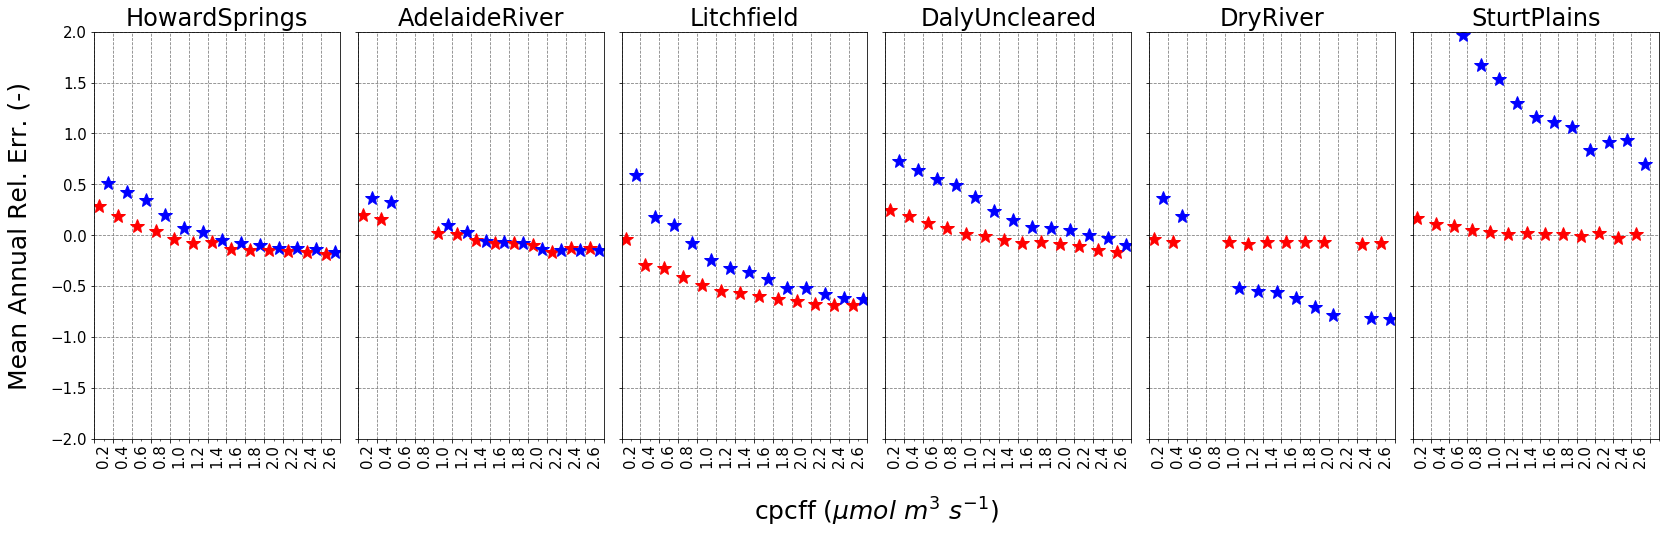

Missing files:  5


In [2]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True)   


i = 0
skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        


            box1 = ax[i].plot([loc], ebest_stats[1], '*r', markersize=15, label="evaporation" ) 
            ax[i].plot([loc+1], assbest_stats[1], '*b', markersize=15, label="assimilation" ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

        
        loc = loc + 2
        
        
    ax[i].set_title(site, size=24  )

    #ax[i].plot( [0.5*loc,0.5*loc], [-2,2], color="black", lw=2)

    ax[i].set_ylim([-2, 2])    
    ax[i].set_xlim([0.5, loc-0.5])    
    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    #ax[i].set_ylabel('Rel. Err (-)', size=20  )
    #ax[i].set_xlabel(r'cpcff $\mu$$mol$ $m^3$ $s^{-1}$', size=20  )
 
    ax[i].set_xticks( np.arange(0.5,28.5, 2)  )  
    ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax[i].set_xticklabels( labels, rotation=90, minor=True )  
    ax[i].set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax[i].xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    i = i +1


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (-)', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The relative errors seem to go down for higher values of the costfactor in most cases. The smallest relative error seem to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 

### Dynamic water tables

../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')


<Figure size 1280x400 with 0 Axes>

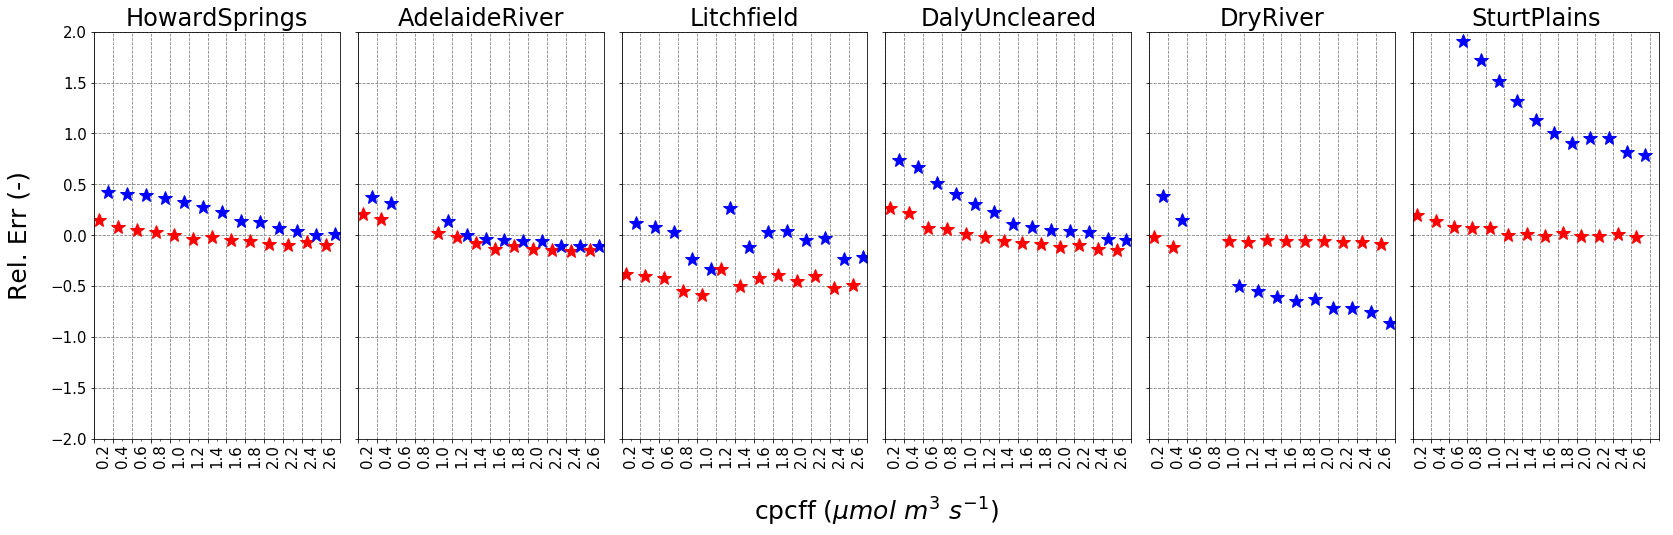

Missing files:  4


In [3]:
#load data, non-freedraining conditions
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True)   


i = 0
skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        


            box1 = ax[i].plot([loc], ebest_stats[1], '*r', markersize=15, label="evaporation" ) 
            ax[i].plot([loc+1], assbest_stats[1], '*b', markersize=15, label="assimilation" ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

        
        loc = loc + 2
        
        
    ax[i].set_title(site, size=24  )

    #ax[i].plot( [0.5*loc,0.5*loc], [-2,2], color="black", lw=2)

    ax[i].set_ylim([-2, 2])    
    ax[i].set_xlim([0.5, loc-0.5])    
    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    #ax[i].set_ylabel('Rel. Err (-)', size=20  )
    #ax[i].set_xlabel(r'cpcff $\mu$$mol$ $m^3$ $s^{-1}$', size=20  )
 
    ax[i].set_xticks( np.arange(0.5,28.5, 2)  )  
    ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax[i].set_xticklabels( labels, rotation=90, minor=True )  
    ax[i].set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax[i].xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    i = i +1


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Rel. Err (-)', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The relative errors seem to go down for higher values of the costfactor in most cases. The smallest relative error seem to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 

## Optimal costfactor
The minimum mean annual relative error should correspond to the most optimal value of the costfactor for water transport


../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/freedrainage_cpcff2.2/sce_stats_best/ass_beststats.txt')


<Figure size 1280x400 with 0 Axes>

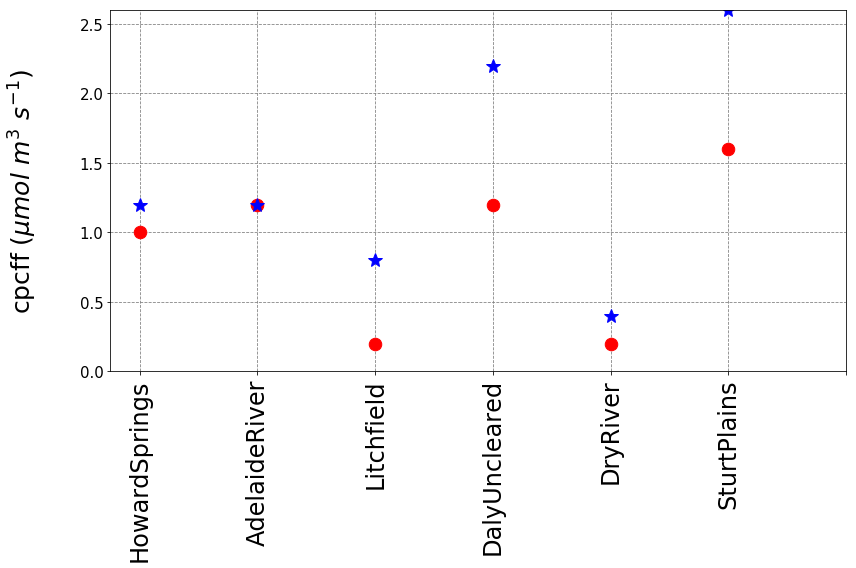

Missing files:  5


In [4]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)   

loc = 1
skipped = 0
#loop over all sites
for site in study_sites:
  
    REe = np.zeros((13))
    REass = np.zeros((13))
    REe[:] = np.nan
    REass[:] = np.nan
    
    i = 0
    #loop over all cpcff-values for the free-draining case
    for cpcff in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt") #mm/d        

            REe[i] = ebest_stats[1]
            REass[i] = assbest_stats[1]
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt')")
        i = i + 1
    
    cpcff_opte = cpcff_vals[abs(REe) == np.nanmin(abs(REe))]
    cpcff_optass = cpcff_vals[abs(REass) == np.nanmin(abs(REass))]

    ax.plot(loc, cpcff_opte, '.r', markersize=25, label="evaporation" ) 
    ax.plot(loc, cpcff_optass, '*b', markersize=15, label="assimilation" ) 
     
    ax.set_ylim([0, 2.6])    
    #ax[i].set_xlim([0.5, loc-0.5])    
    ax.grid(b=True, which='major', color='grey', linestyle='--')
 
    ax.set_xticks( np.arange(1,8)  )  
    #ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax.set_xticklabels( study_sites, rotation=90, fontsize = 24 )  
    #ax.set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    loc = loc + 1

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.xlabel('', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')


<Figure size 1280x400 with 0 Axes>

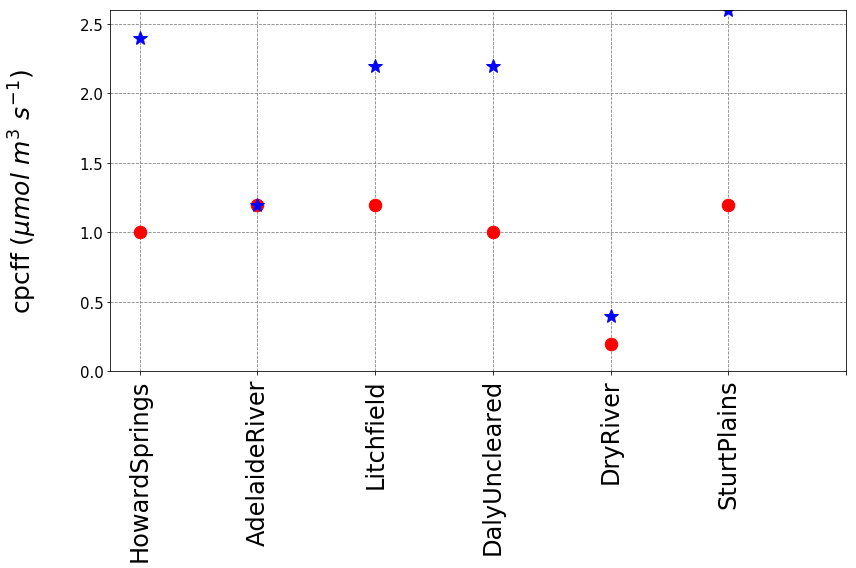

Missing files:  4


In [5]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)   

loc = 1
skipped = 0
#loop over all sites
for site in study_sites:
  
    REe = np.zeros((13))
    REass = np.zeros((13))
    REe[:] = np.nan
    REass[:] = np.nan
    
    i = 0
    #loop over all cpcff-values for the free-draining case
    for cpcff in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + cpcff + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt") #mm/d        

            REe[i] = ebest_stats[1]
            REass[i] = assbest_stats[1]
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt')")
        i = i + 1
    
    cpcff_opte = cpcff_vals[abs(REe) == np.nanmin(abs(REe))]
    cpcff_optass = cpcff_vals[abs(REass) == np.nanmin(abs(REass))]

    ax.plot(loc, cpcff_opte, '.r', markersize=25, label="evaporation" ) 
    ax.plot(loc, cpcff_optass, '*b', markersize=15, label="assimilation" ) 
     
    ax.set_ylim([0, 2.6])    
    #ax[i].set_xlim([0.5, loc-0.5])    
    ax.grid(b=True, which='major', color='grey', linestyle='--')
 
    ax.set_xticks( np.arange(1,8)  )  
    #ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax.set_xticklabels( study_sites, rotation=90, fontsize = 24 )  
    #ax.set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    loc = loc + 1

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.xlabel('', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The most optimal values, i.e. the cpcff-value with smallest relative error, still varies considerably between the study sites. Hence, even though the range is now extended, we cannot draw conclusions on what value it should have.

## Timeseries of evaporation
### Free-draining conditions

/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


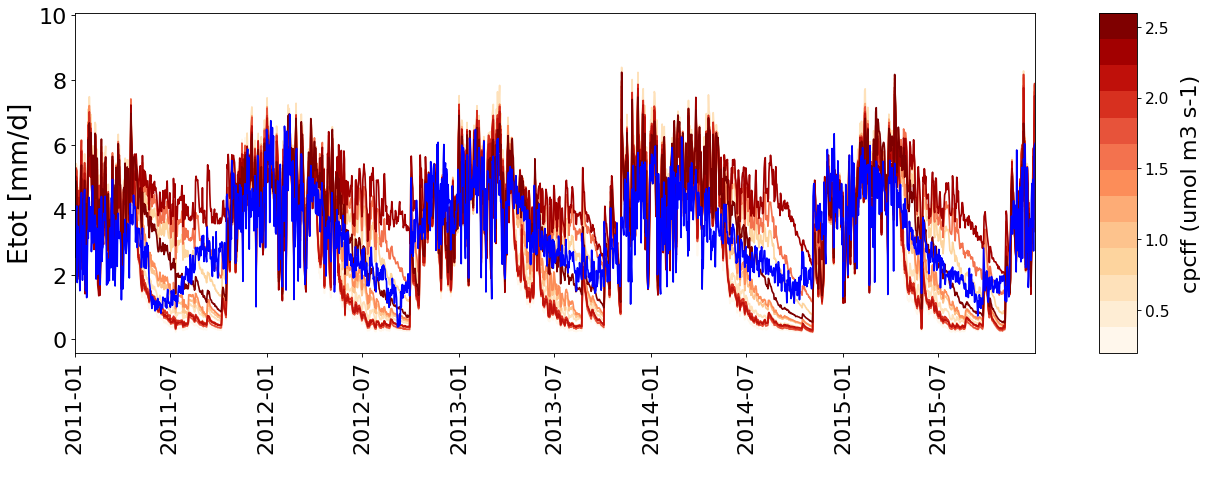

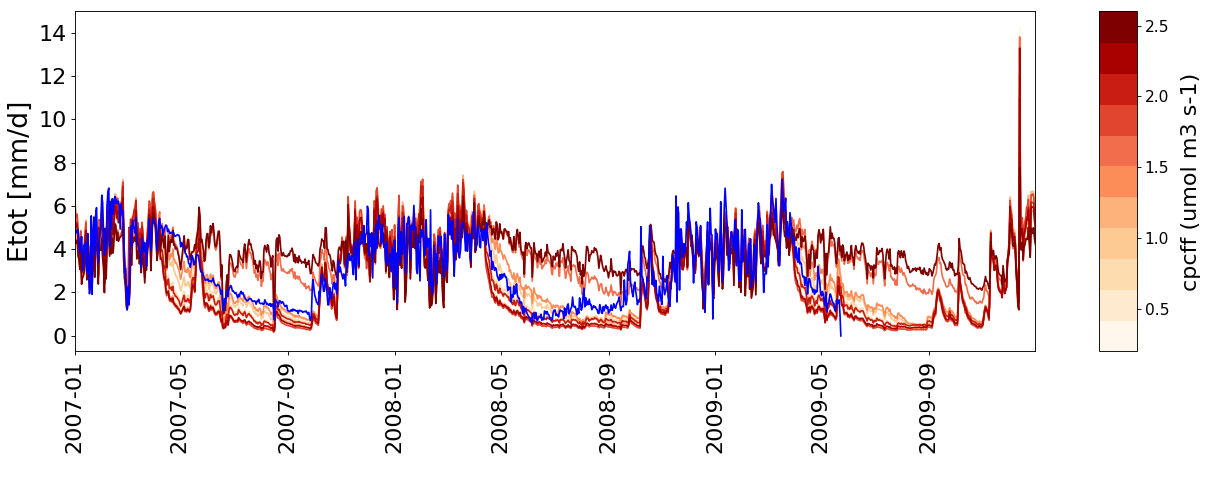

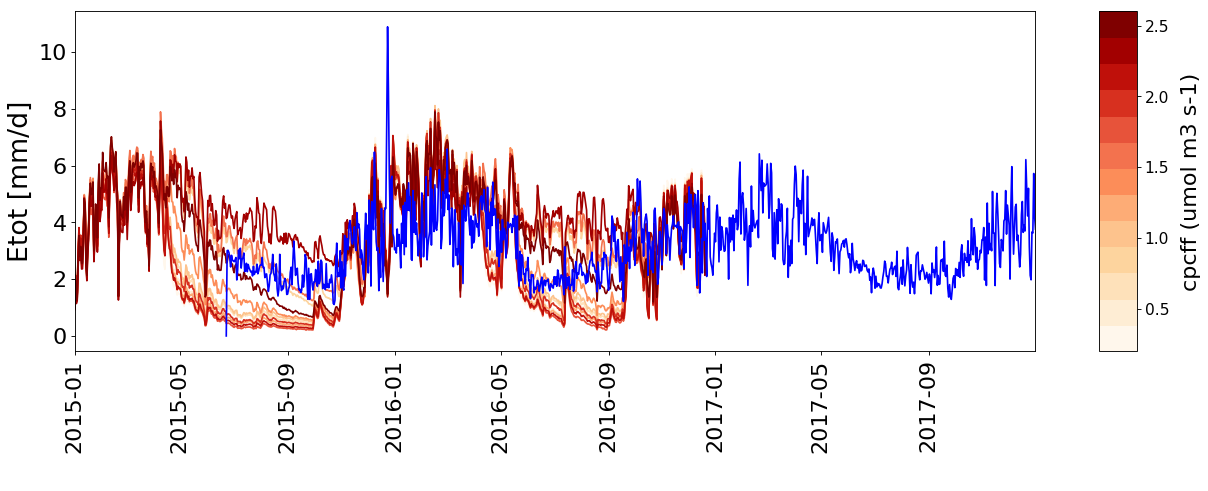

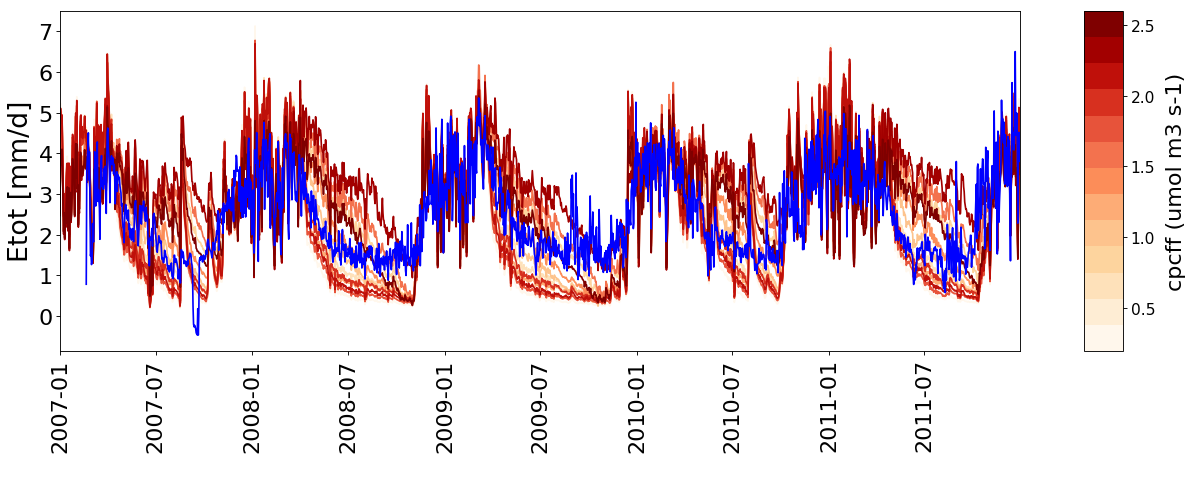

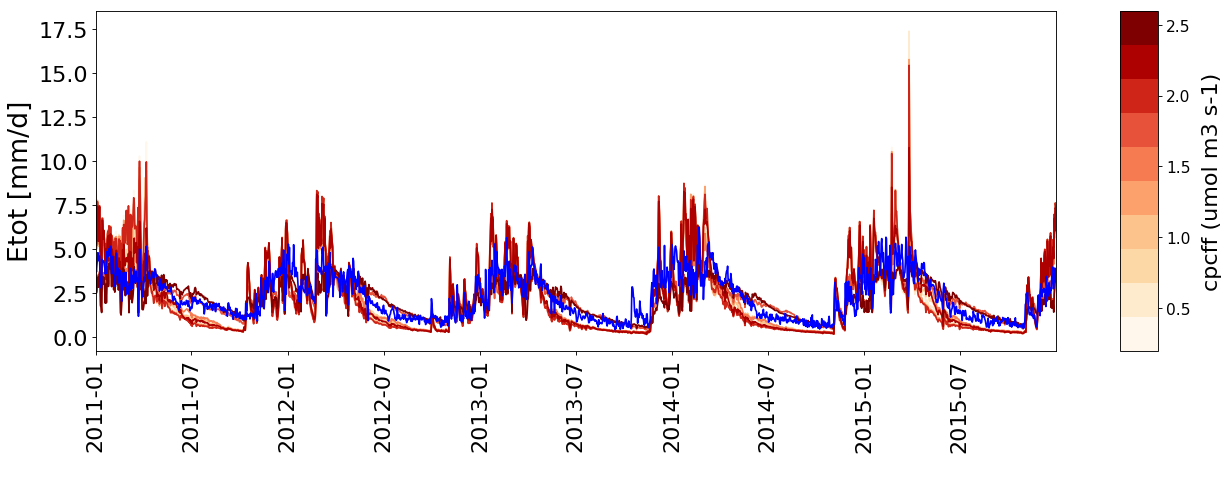

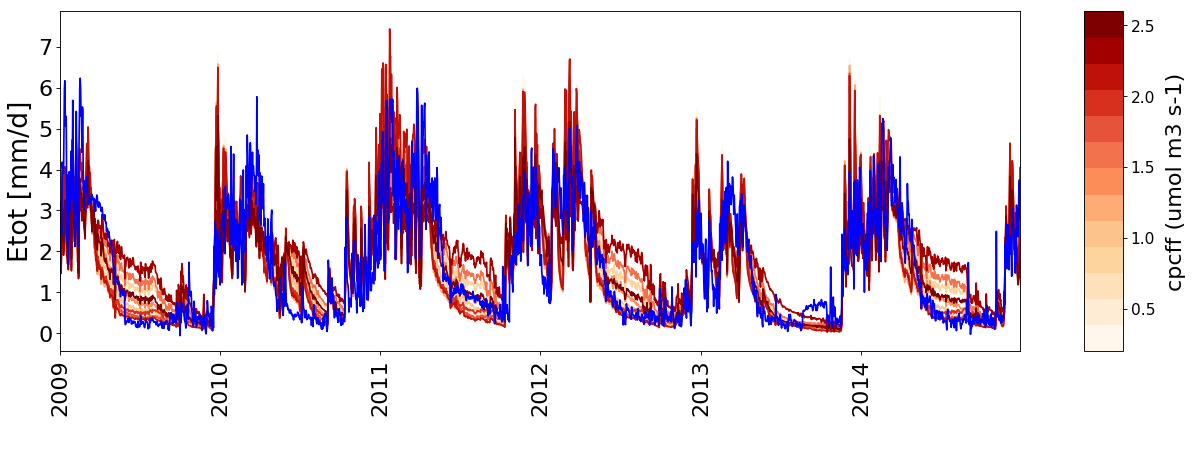

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2


The timeseries of total evaporation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue), similar as the plots of relative errors suggest. Best results seem to be in the mid-range of the values. 

### Dynamic water tables

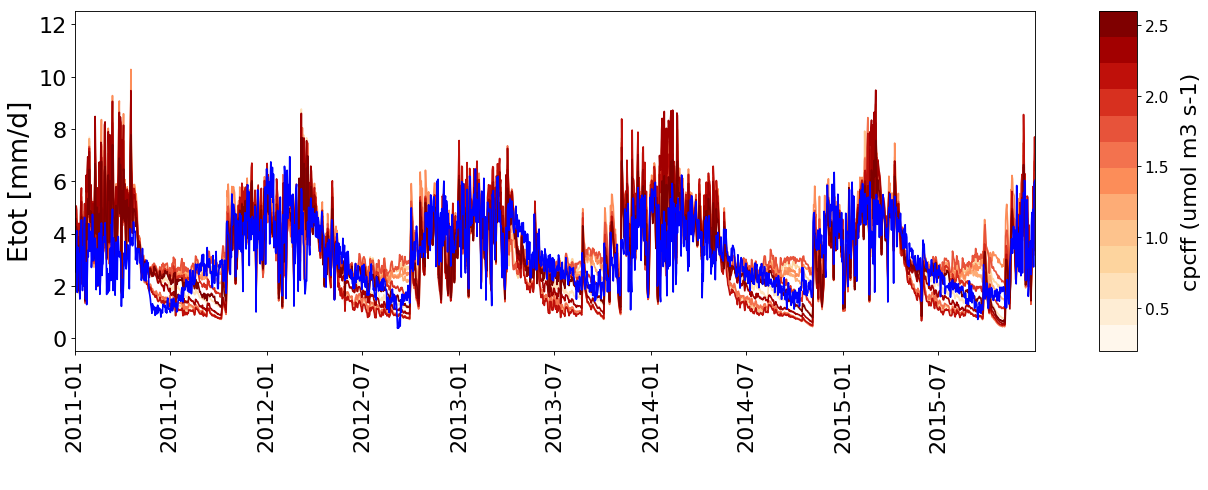

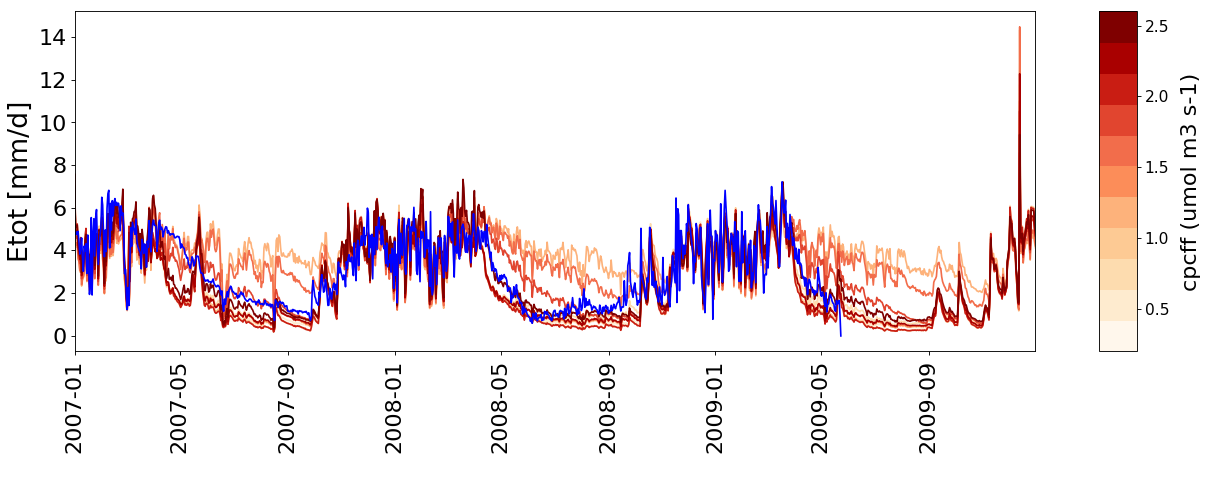

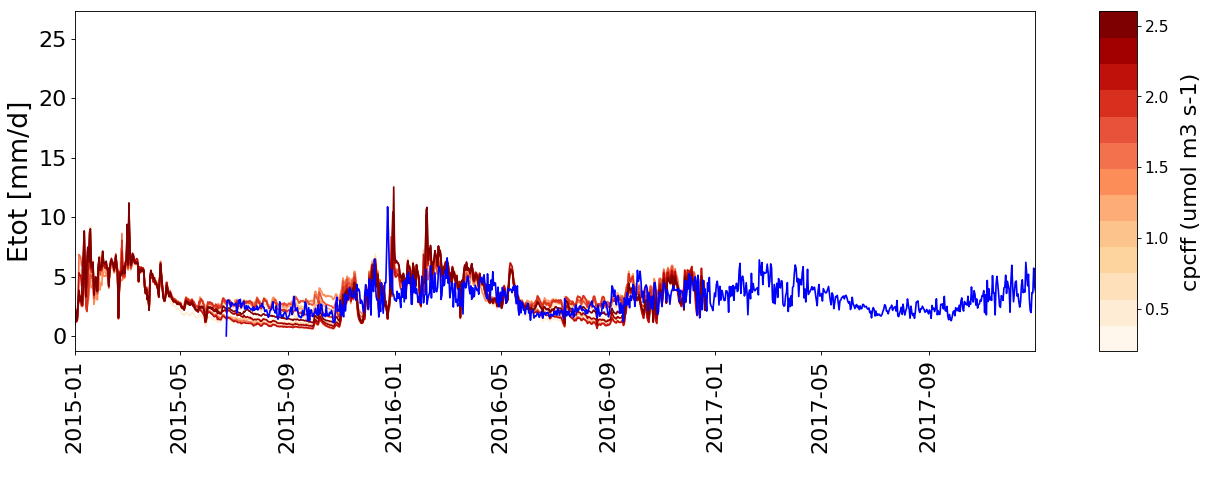

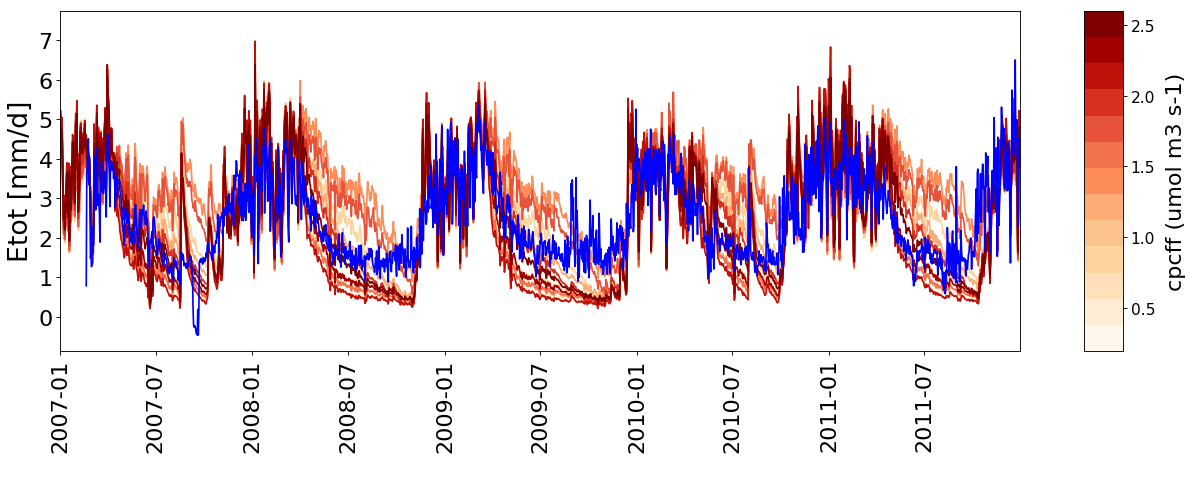

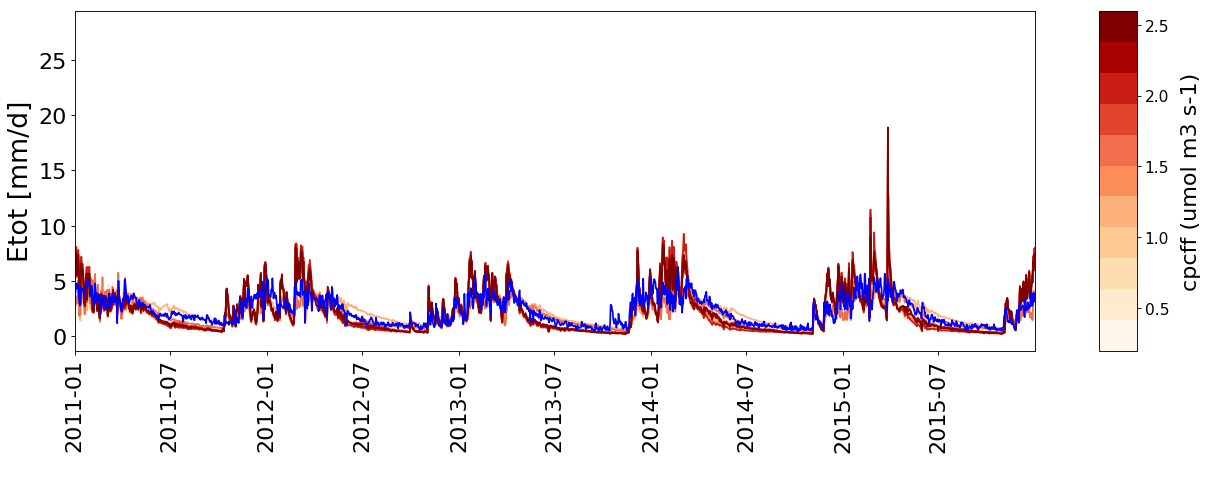

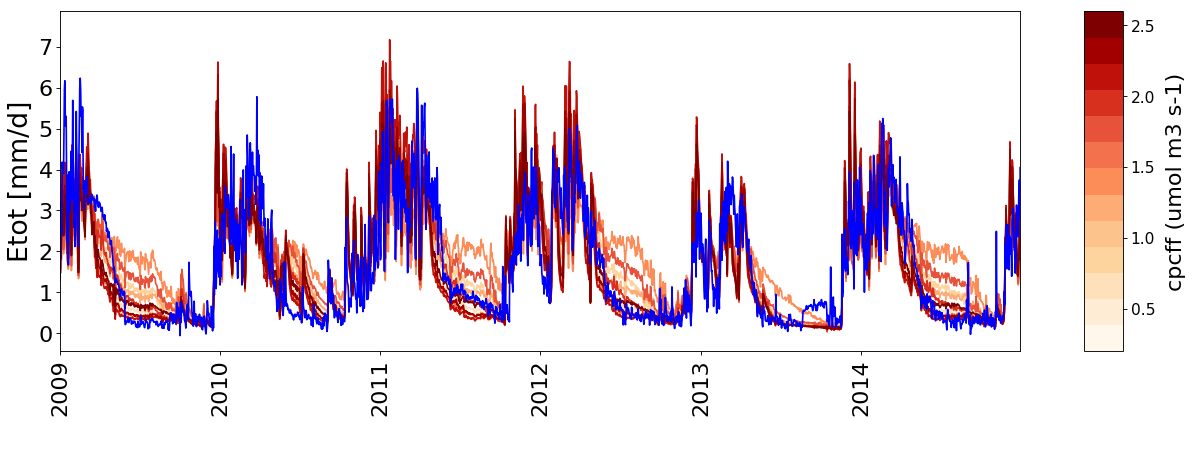

In [7]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2


Also for case of the dynamic water tables, the timeseries of total evaporation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue), similar as the plots of relative errors suggest. Best results seem to be in the mid-range of the values. 

## Timeseries of assimilation
### Free-draining conditions

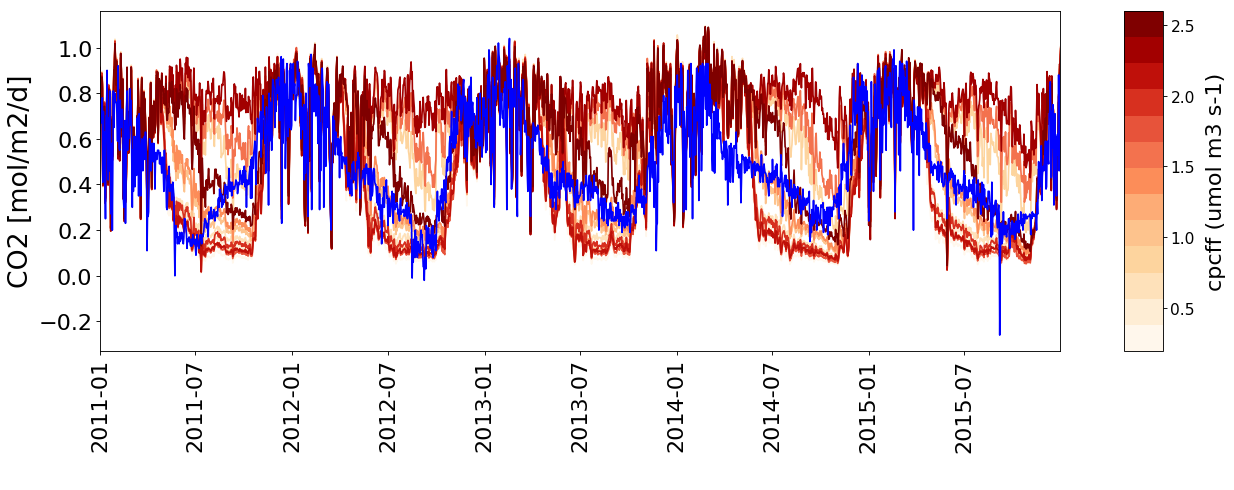

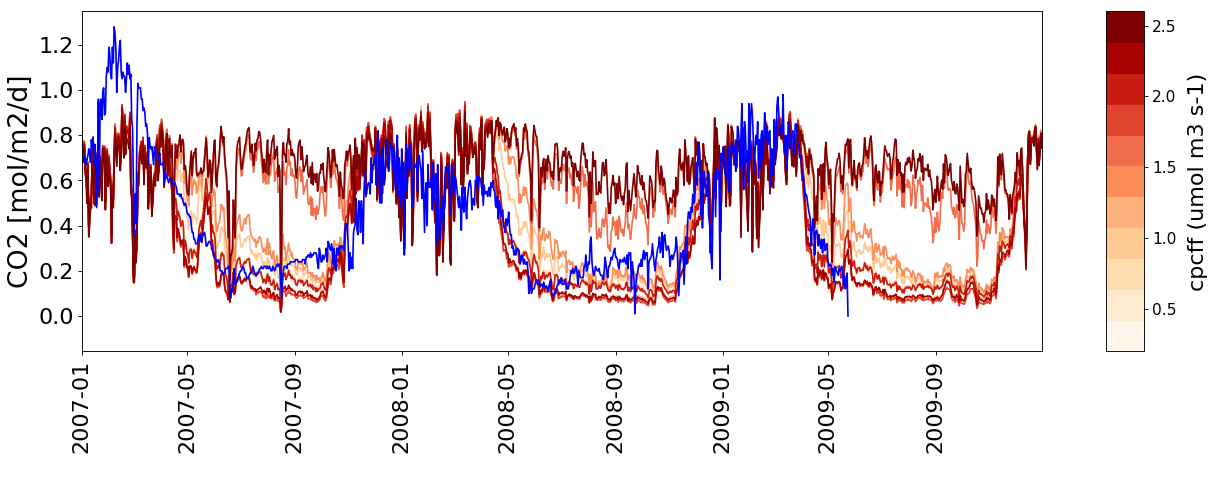

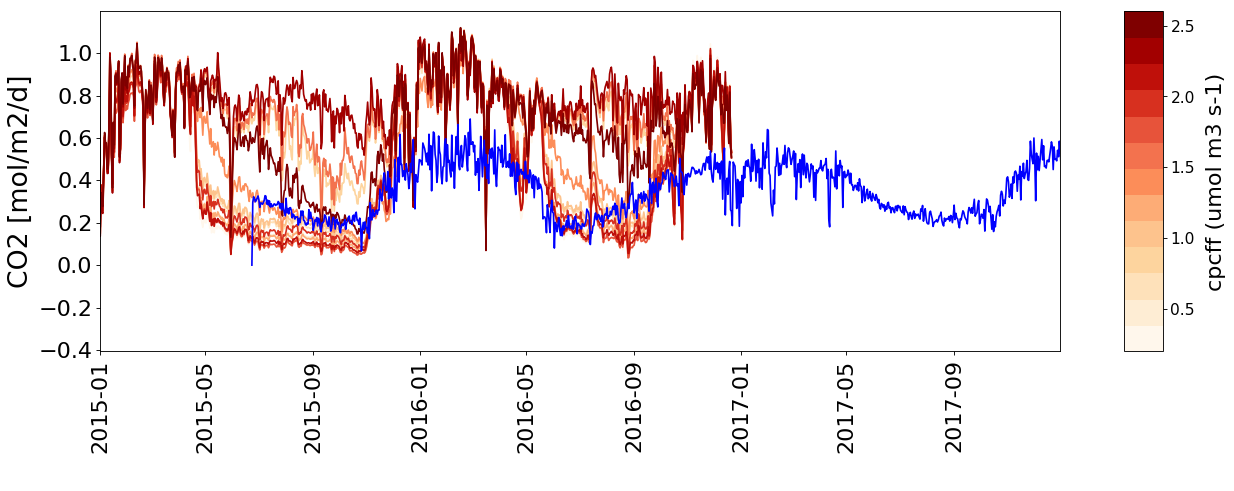

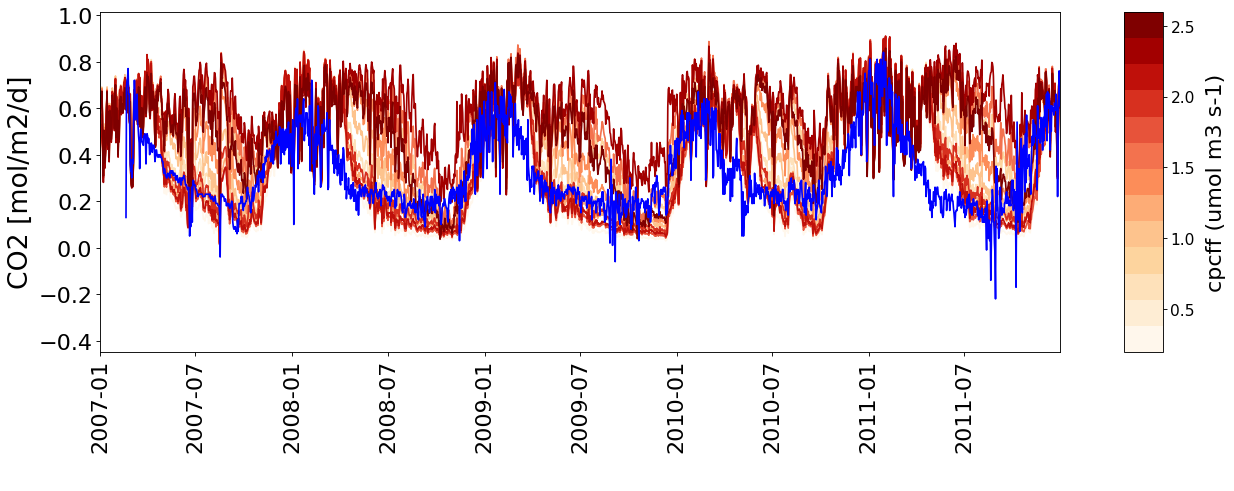

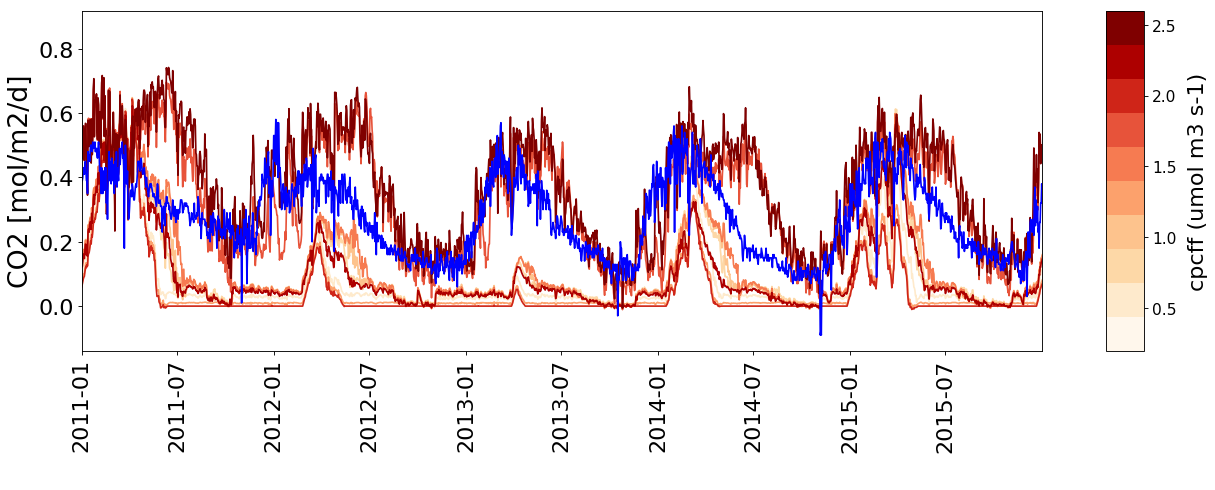

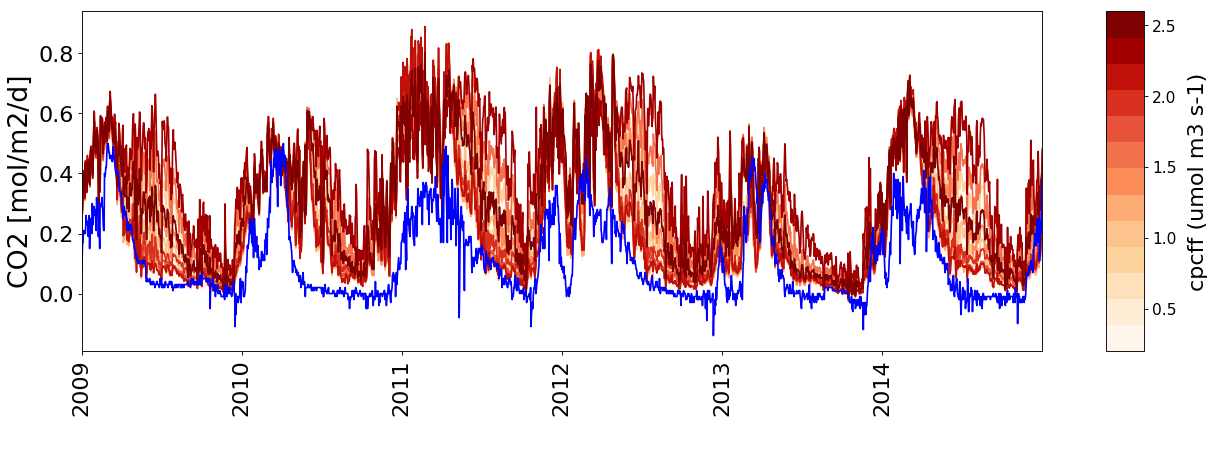

In [8]:


#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2


The timeseries of total assimilation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue). Best results seem to be in the mid-range of the values. However, strong off-sets can be observed for several cases of the DryRiver (5th plot), where values approach zero. SturtPlains still shows a large bias too. 

### Dynamic water tables

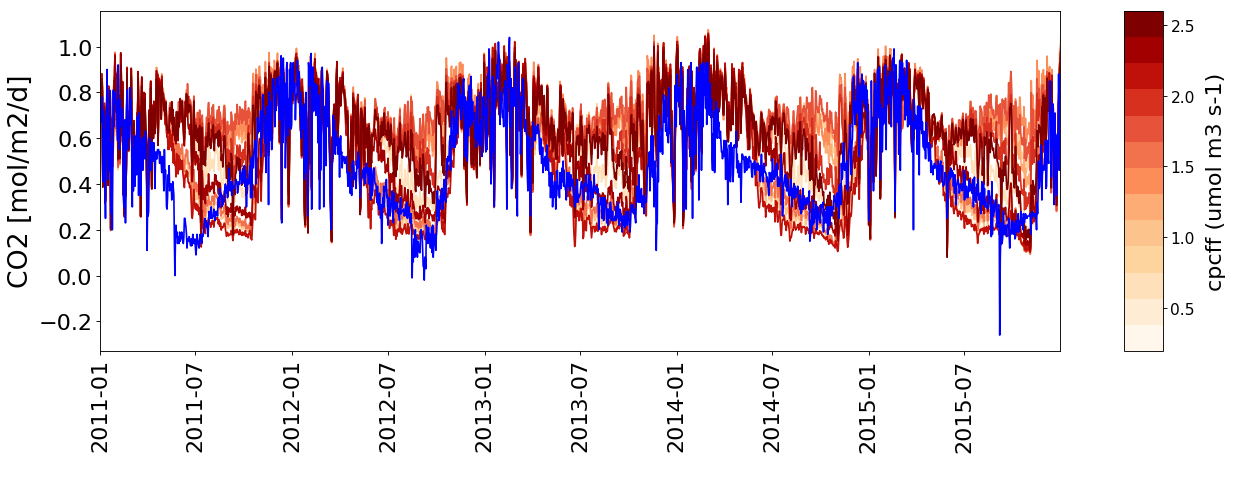

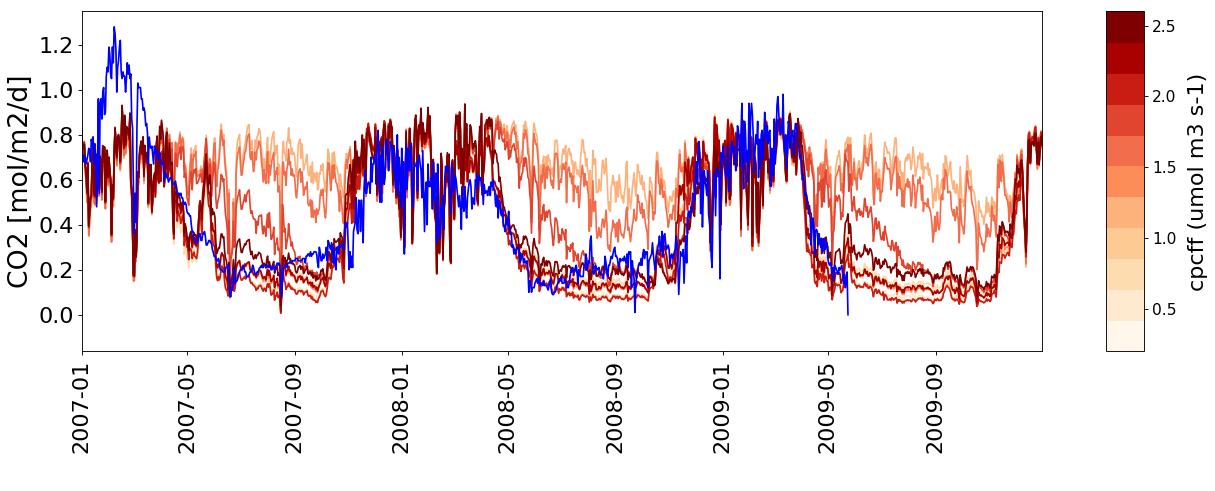

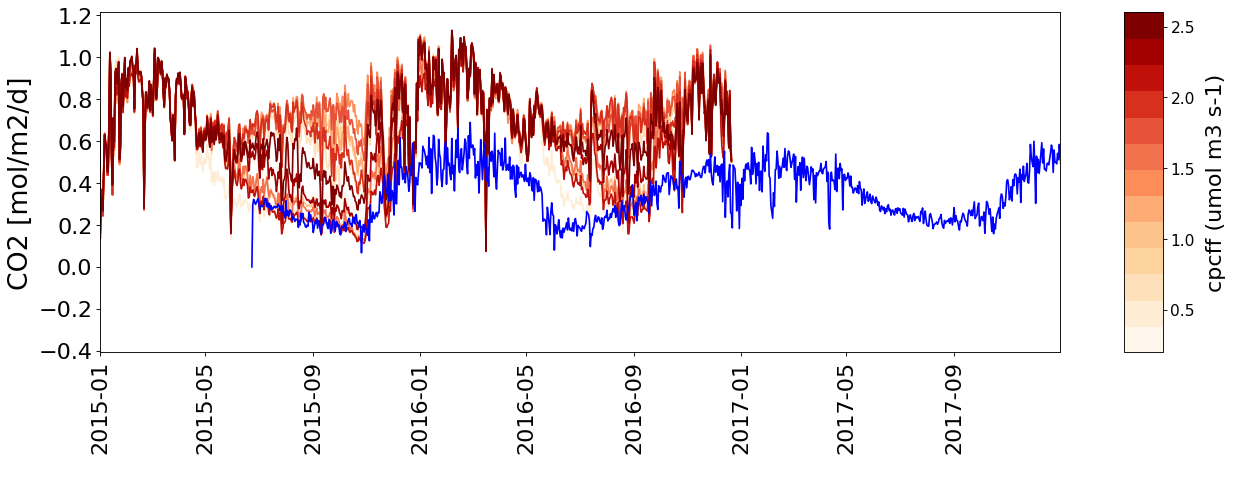

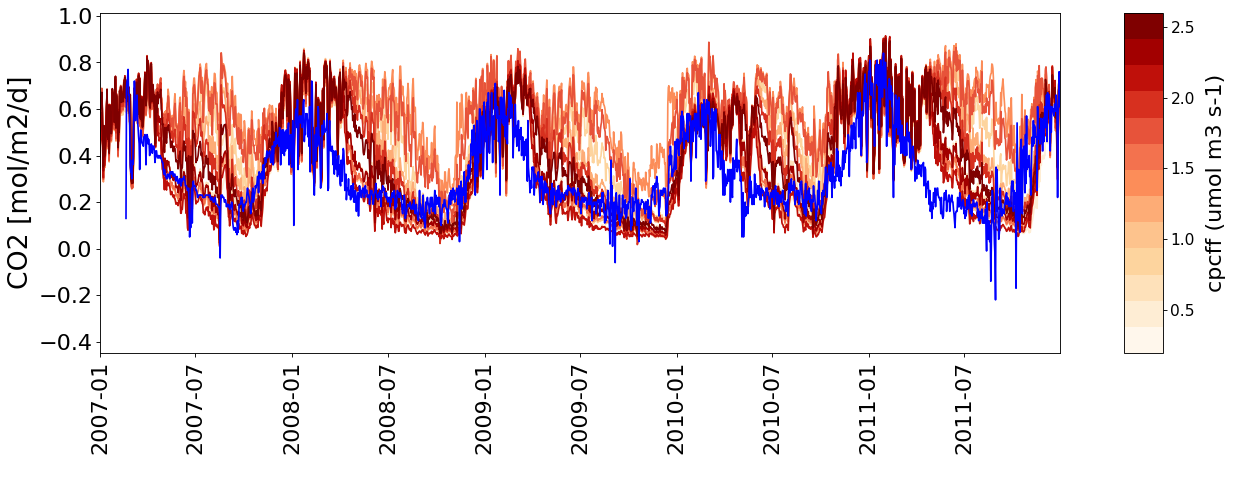

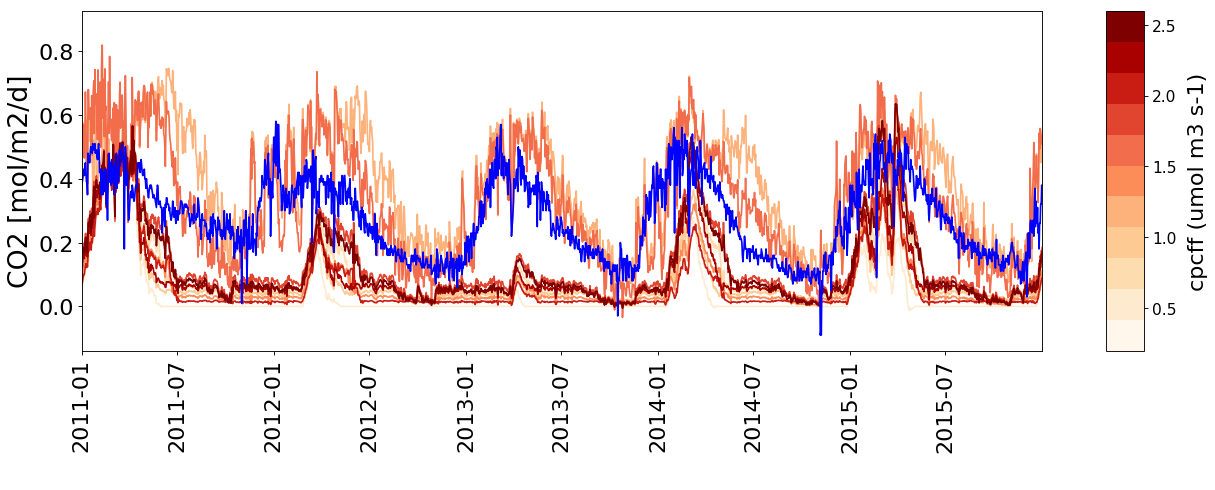

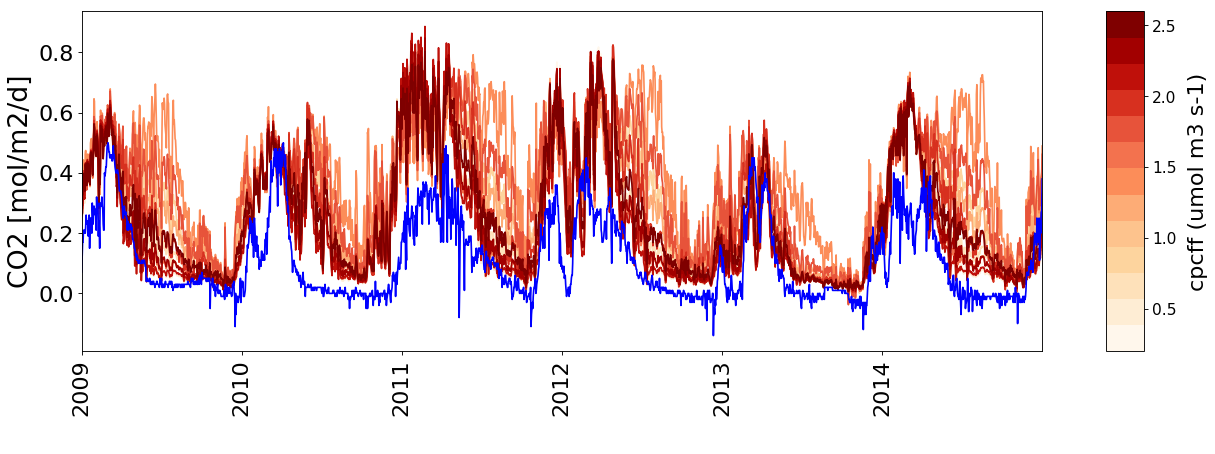

In [9]:


#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/nofreedrainage_cpcff???/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" --plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2


The timeseries of total assimilation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue). Best results seem to be in the mid-range of the values. However, strong off-sets can be observed for several cases of the DryRiver (5th plot), where values approach zero. SturtPlains still shows a large bias too. 